# Task-02: Customer Segmentation Using K-Means Clustering
# Author: Ferzeen Tahir

### Introduction:

#### Objective:
The aim of this analysis is to perform customer segmentation using K-Means Clustering. The goal is to identify distinct groups within the customer based on their annual income and spending score. By clustering customers into different segments, we can better understand their behavior and tailor marketing strategies to each group.

#### Dataset:
The dataset used for this analysis is the "Mall_Customers.csv," which contains information about customers of a shopping mall. The dataset consists of 200 rows and 5 columns. The dataset includes the following columns:

- **CustomerID**: Unique identifier for each customer.
- **Gender**: Gender of the customer.
- **Age**: Age of the customer.
- **Annual Income (k$)**: Annual income of the customer in thousands of dollars.
- **Spending Score (1-100)**: Spending score assigned to the customer, ranging from 1 to 100.


## Step-01: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from kneed import KneeLocator
import warnings
warnings.filterwarnings('ignore')

## Step-02: Load Data

In [2]:
# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

## Step-03: Data Inspection

In [3]:
# Display the first 5 rows of the dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Display the last 5 rows of the dataset
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
# Display the shape of the dataset
df.shape

(200, 5)

In [6]:
# Get information about data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# Check for duplicated rows
df.duplicated().sum()

0

In [8]:
# Display statistical summary of the dataset
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


* No need to clean the data as there are no missing or duplicate values in the dataset.

## Step-04: Visualization

Gender
Female    56.0
Male      44.0
Name: count, dtype: float64


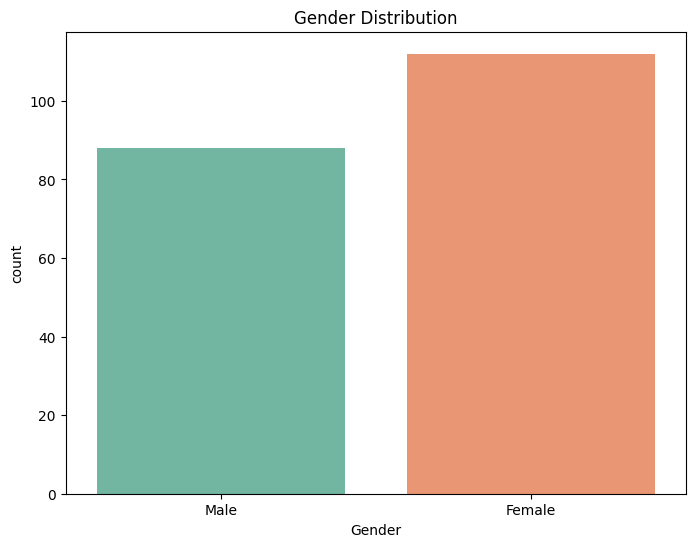

In [9]:
# Gender Distribution Analysis
print(df['Gender'].value_counts() / len(df) * 100)

plt.figure(figsize=(8, 6))
sns.countplot(df, x='Gender', palette='Set2')
plt.title('Gender Distribution')
plt.show()

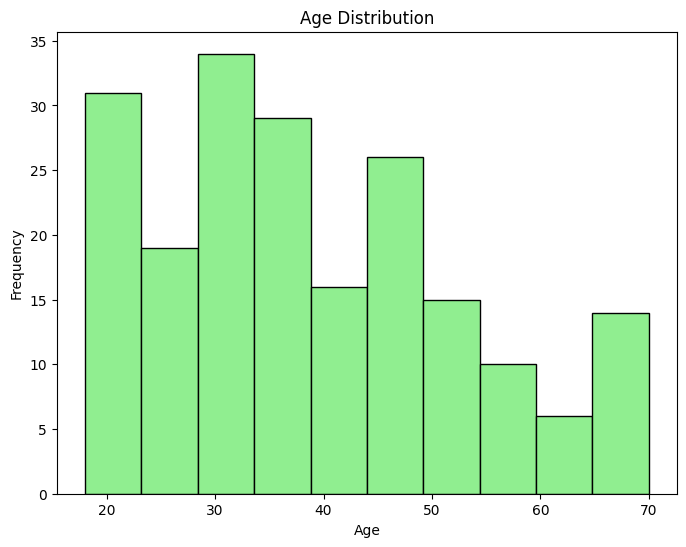

In [10]:
# Age Distribution Analysis
plt.figure(figsize=(8, 6))
df['Age'].plot(kind='hist', bins=10, color='lightgreen', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

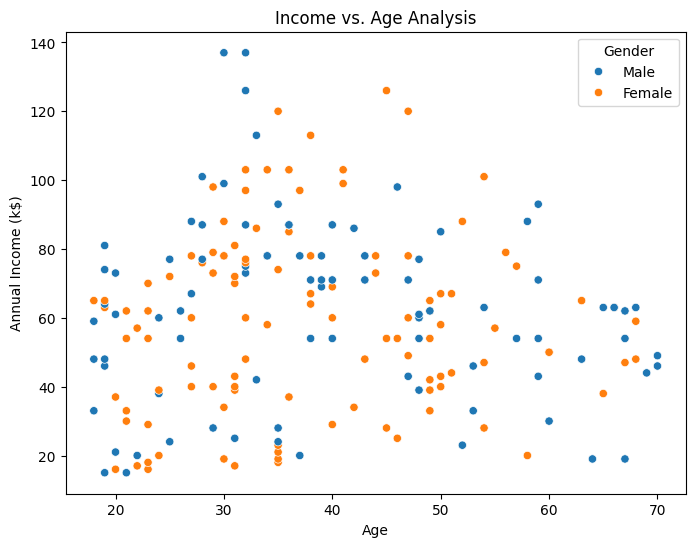

In [11]:
# Income vs. Age Analysis
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Gender', data=df)
plt.title('Income vs. Age Analysis')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend(title='Gender')
plt.show()

### Few Observations:
1. The dataset contains 56% female and 44% male customers.
2. The age distribution shows a relatively even spread across different age groups, with a slight concentration in the 30-40 age range.
3. There’s no strong linear correlation between age and income.



## Step-05: Feature Selection

In [12]:
# Select relevant features for clustering
features = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

## Step-06: Determine the Number of Clusters

In [13]:
# Elbow Method to find the optimal number of clusters
# Calculate Within-Cluster Sum of Squares (WCSS) for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

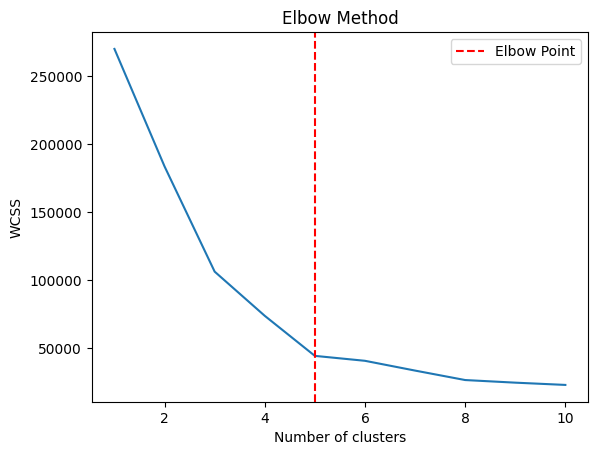

The optimal number of clusters is: 5


In [14]:
# Plot the Elbow curve to visualize the WCSS for each number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Find the Elbow point using KneeLocator
kneedle = KneeLocator(range(1, 11), wcss, curve = 'convex', direction = 'decreasing')
optimal_k = kneedle.elbow

#Add a vertival line to indicate the Elbow point
plt.axvline(x = optimal_k, color = 'r', linestyle = '--', label = 'Elbow Point')
plt.legend()
plt.show()

print(f"The optimal number of clusters is: {optimal_k}")


## Step-07: Apply K-Means Clustering

In [15]:
# Fit K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters = optimal_k, init = 'k-means++', random_state = 0)
clusters = kmeans.fit_predict(features)
clusters

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [16]:
# Add cluster labels to the original dataset
df['Cluster_No'] = clusters
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_No
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


In [17]:
# Count the number of customers in each cluster
cluster_counts = df['Cluster_No'].value_counts().sort_index()

# Display the counts for each cluster
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster + 1}: {count} customers")

Cluster 1: 81 customers
Cluster 2: 39 customers
Cluster 3: 35 customers
Cluster 4: 23 customers
Cluster 5: 22 customers


## Step-08: Visualize the Clusters

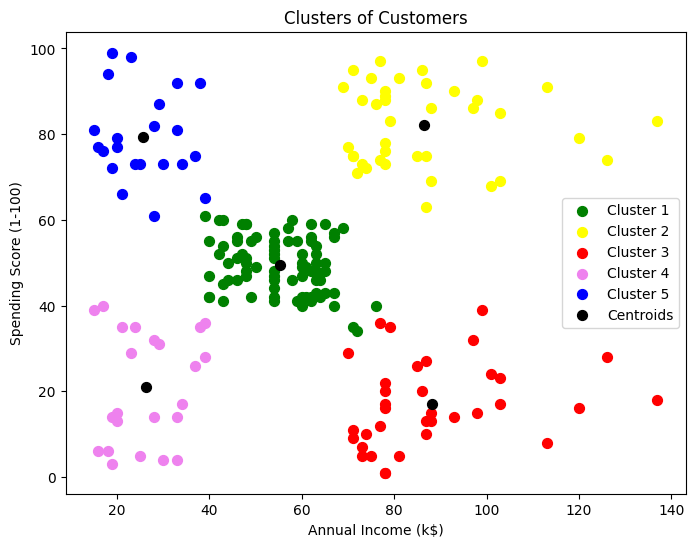

In [18]:
# Plot the clusters
plt.figure(figsize = (8, 6))
plt.scatter(features[clusters == 0,0], features[clusters == 0,1], s = 50, c = 'green', label = 'Cluster 1')
plt.scatter(features[clusters == 1,0], features[clusters == 1,1], s = 50, c = 'yellow', label = 'Cluster 2')
plt.scatter(features[clusters == 2,0], features[clusters == 2,1], s = 50, c = 'red', label = 'Cluster 3')
plt.scatter(features[clusters == 3,0], features[clusters == 3,1], s = 50, c = 'violet', label = 'Cluster 4')
plt.scatter(features[clusters == 4,0], features[clusters == 4,1], s = 50, c = 'blue', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## From Above Visualization:
* Cluster 1: Customers with medium annual income and medium spending score.
* Cluster 2: Customers with high annual income and high spending score.
* Cluster 3: Customers with high annual income and low spending score.
* Cluster 4: Customers with low annual income and low spending score.
* Cluster 5: Customers with low annual income and high spending score.